# QOSF Task 2
by Harvey Cao

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_state_qsphere, plot_histogram

#installs:
#pylatexenc for 'mpl' 
#qiskit

Desired two-qubit state: [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


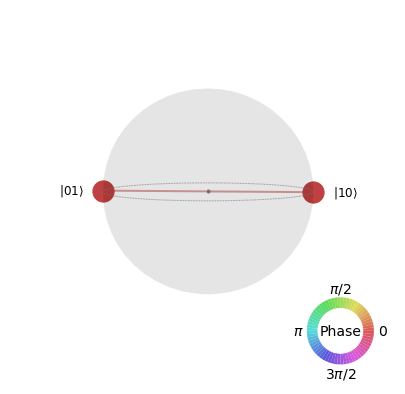

In [2]:
#Initialise the desired |01> + |10> state directly for visualisation. Normalisation factors
bell_state = [0, 1/np.sqrt(2), 1/np.sqrt(2), 0]
sv = Statevector(bell_state)
print("Desired two-qubit state:", sv.data)
plot_state_qsphere(sv)

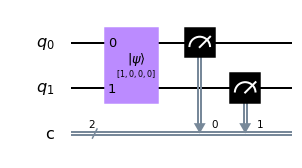

In [4]:
#Initialize a circuit with |00> initial state
def initializeCircuit():
    
    #Qiskit initializes qubits to the |0> state by default already, but here we initialise it implicitly
    initial_state = [1., 0., 0., 0.]
    
    #Define a register of two qubits, and two bits
    q_reg = QuantumRegister(2, 'q')
    c_reg = ClassicalRegister(2, 'c')
    
    #Define circuit with registers and initialize to the |00> state
    circuit = QuantumCircuit(q_reg, c_reg)
    circuit.initialize(initial_state, [q_reg[0], q_reg[1]])
    
    return circuit, q_reg, c_reg
    
initial_circ, q_reg, c_reg = initializeCircuit()
initial_circ.measure(q_reg, c_reg)
initial_circ.draw('mpl')

In [5]:
def runBackend(circuit, num_shots=1000, backend='qasm_simulator', hist=True):
    
    #Set up access to backend for noisy quantum circuit simulator
    backend = Aer.get_backend(backend)
    
    #Execute circuit on backend
    job = execute(circuit, backend, shots=num_shots)
    
    #Obtain the measurement results over many iterations and print counts
    result = job.result()
    counts = result.get_counts(circuit)
    print("\nTotal count:",counts)
    
    #Plotting results in histogram
    if hist:
        plot_histogram(counts)

runBackend(initial_circ)


Total count: {'00': 1000}


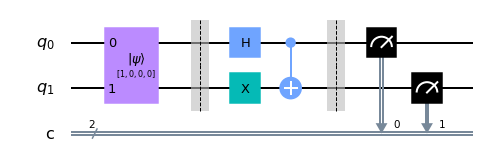

In [6]:
#Setup |00> state
circ, q_reg, c_reg = initializeCircuit()

#Perform gates to transform to desired Bell state
circ.barrier()
circ.x(q_reg[1])
circ.h(q_reg[0])
circ.cx(q_reg[0],q_reg[1])

#Measure qubits
circ.barrier()
circ.measure(q_reg, c_reg)

circ.draw('mpl')

In [7]:

num_shots = 1000
runBackend(circ, num_shots)


Total count: {'01': 481, '10': 519}


In [8]:
sv = Statevector(initial_state)
new_sv = sv.evolve(circuit)
plot_state_qsphere(new_sv.data)

NameError: name 'initial_state' is not defined

Circuit implemented that returns the desired state. But requirement says that Hadamard gate cannot be used. Need to decompose Hadamard into RX, RY and CNOT gates only.